# Задача регрессии
<ul>
    <li>Исследуемый датасет: <a>https://www.kaggle.com/neuromusic/avocado-prices</a></li>
    <li>Описание задачи: Вычислить цену авокадо</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("datasets/avocado/avocado.csv",index_col=0)

нет пропущенных данных

In [3]:
dataset.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
21,2017-08-06,1.43,10179.13,861.22,28.71,0.00,9289.20,9289.20,0.00,0.00,organic,2017,Pittsburgh
12,2017-10-08,1.64,195455.06,62574.22,60756.44,75.85,72048.55,47487.79,24560.76,0.00,conventional,2017,LasVegas
35,2016-04-24,1.64,3650.65,1906.63,95.77,14.92,1633.33,1633.33,0.00,0.00,organic,2016,Jacksonville
12,2017-10-08,1.66,87278.58,26135.12,16257.01,73.31,44813.14,38450.63,6362.51,0.00,conventional,2017,Roanoke
41,2017-03-19,1.04,6242381.13,2318973.17,1100226.44,142718.03,2680463.49,1775537.50,900751.44,4174.55,conventional,2017,West


In [4]:
dataset.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<b>Преобразование типа object к числовым типам</b>

In [5]:
du = {"type":[],"region":[]}
for i in du.keys():
    du[i] = dataset[i].unique()
du

{'type': array(['conventional', 'organic'], dtype=object),
 'region': array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)}

In [6]:
du_encoder, du_decoder = du.copy(), du.copy()
for i in du:
    du_encoder[i] = { du[i][j]:j for j in range(0, len(du[i]))}
    du_decoder[i] = { j:du[i][j] for j in range(0, len(du[i]))}

du_encoder, du_decoder

({'type': {'conventional': 0, 'organic': 1},
  'region': {'Albany': 0,
   'Atlanta': 1,
   'BaltimoreWashington': 2,
   'Boise': 3,
   'Boston': 4,
   'BuffaloRochester': 5,
   'California': 6,
   'Charlotte': 7,
   'Chicago': 8,
   'CincinnatiDayton': 9,
   'Columbus': 10,
   'DallasFtWorth': 11,
   'Denver': 12,
   'Detroit': 13,
   'GrandRapids': 14,
   'GreatLakes': 15,
   'HarrisburgScranton': 16,
   'HartfordSpringfield': 17,
   'Houston': 18,
   'Indianapolis': 19,
   'Jacksonville': 20,
   'LasVegas': 21,
   'LosAngeles': 22,
   'Louisville': 23,
   'MiamiFtLauderdale': 24,
   'Midsouth': 25,
   'Nashville': 26,
   'NewOrleansMobile': 27,
   'NewYork': 28,
   'Northeast': 29,
   'NorthernNewEngland': 30,
   'Orlando': 31,
   'Philadelphia': 32,
   'PhoenixTucson': 33,
   'Pittsburgh': 34,
   'Plains': 35,
   'Portland': 36,
   'RaleighGreensboro': 37,
   'RichmondNorfolk': 38,
   'Roanoke': 39,
   'Sacramento': 40,
   'SanDiego': 41,
   'SanFrancisco': 42,
   'Seattle': 43,
   

Удааление ненужной колонки с датой

In [7]:
data = dataset.drop(['Date'], axis=1).copy()
for i in du_encoder:
    data[i] = data[i].map(du_encoder[i])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [8]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


<b>Визуализация данных</b>

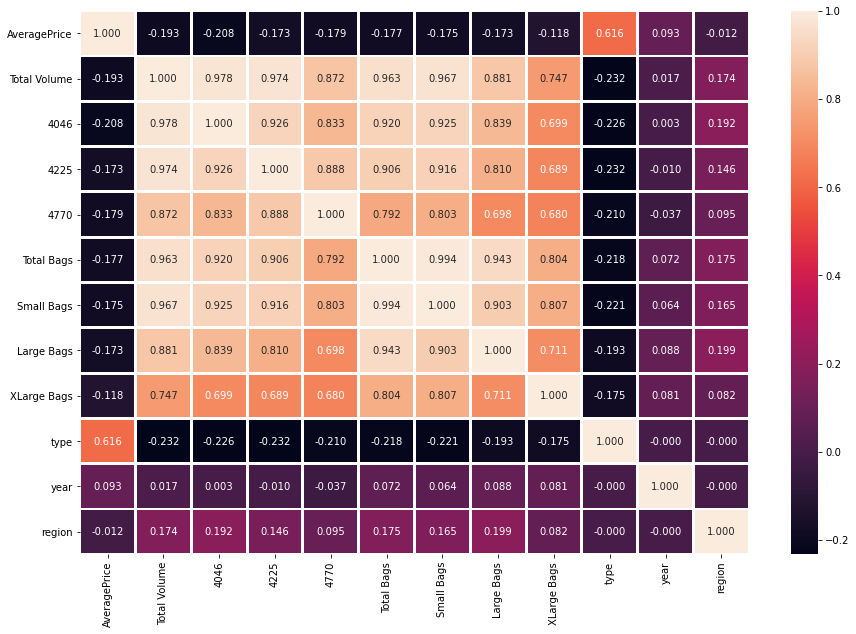

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True, fmt='.3f', linewidths=2)

Разделение датасета на обучающую и тестовую выборку

In [10]:
y = data['AveragePrice']
x = data.drop(columns = ['AveragePrice'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

<b>Линейная регрессия</b>

In [11]:
linreg = LinearRegression().fit(x_train,y_train)

In [12]:
round(linreg.score(x_test, y_test), 3)

0.388

<b>Пример работы алгоритма</b><br>
выберем случайную строку и посчитаем предсказанную цену для данной строки и сравним с average price

In [13]:
rand_row = data.sample()
rand_row

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
48,1.63,54932.83,11160.54,26029.58,3297.83,14444.88,11428.78,3016.1,0.0,1,2015,25


In [14]:
linreg.predict(rand_row.drop("AveragePrice", axis=1))[0]

1.608505145631895